### Import pachages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u  
from astropy.coordinates import SkyCoord

### Import Files

In [9]:
filenametxt='/home/juan/Desktop/Research/Data2.0/CoordsPeakClass.txt'

### Source Info.

In [12]:
ra,dec,pkintC18O,sclass= np.loadtxt(filenametxt,unpack=True,usecols=(0,1,2,3),dtype='S')
coord=SkyCoord(ra,dec,frame='icrs',unit=(u.hourangle,u.deg))

### C18O Peak Intensity

In [13]:
lpkintC18O=[]
for i in range(len(pkintC18O)):
	lpkintC18O.append(float(pkintC18O[i]))

### Source Distance

In [14]:
c1=SkyCoord(ra=277.5148313*u.degree, dec=-2.048732216*u.degree, distance=436*u.pc, frame='icrs')
ldist=[]
for i in range(len(coord)):
	c2 = SkyCoord(ra=coord[i].ra, dec=coord[i].dec, distance=436*u.pc, frame='icrs')
	dist=c1.separation_3d(c2)
	ldist.append(dist.value)

### Source Class

In [15]:
ldistN=[]
ldist0_I=[]
ldistF=[]
lpkintC18ON=[]
lpkintC18O0_I=[]
lpkintC18OF=[]
for i in range(len(pkintC18O)):
	if sclass[i]=='N':
		lpkintC18ON.append(float(pkintC18O[i]))
		ldistN.append(float(ldist[i]))
	elif sclass[i]=='F':
		lpkintC18OF.append(float(pkintC18O[i]))
		ldistF.append(float(ldist[i]))
	else:
		lpkintC18O0_I.append(float(pkintC18O[i]))
		ldist0_I.append(float(ldist[i]))

### Plot

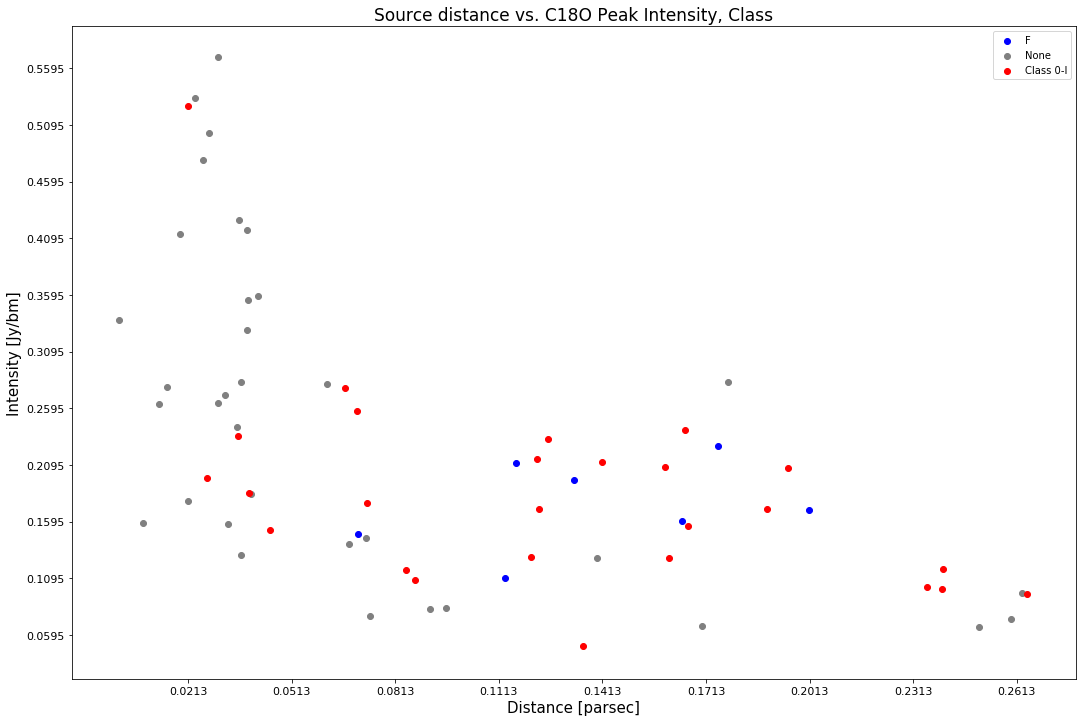

In [16]:
figname='67 Sources distance vs. C18O Peak Intensity, Class'
fig=plt.figure('Source distance vs. C18O Peak Intensity, Class',figsize=(18,12))
plt.title('Source distance vs. C18O Peak Intensity, Class')
plt.xlabel('Distance [parsec]')
plt.ylabel('Intensity [Jy/bm]')
plt.rc('axes', titlesize=17,labelsize=15)
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11) 
plt.xticks(np.arange(min(ldist0_I),max(ldist0_I),0.03))
plt.yticks(np.arange(min(lpkintC18O0_I)-0.04,max(lpkintC18O0_I)+0.2,0.05))
plt.scatter(ldistF,lpkintC18OF,color='blue',label='F')
plt.scatter(ldistN,lpkintC18ON,color='gray',label='None')
plt.scatter(ldist0_I,lpkintC18O0_I,color='red',label='Class 0-I')
plt.legend()
#fig.savefig(figname+'.png')
#plt.show()
#plt.close(fig)

In [ ]:
fig